<a href="https://colab.research.google.com/github/pandeysak/Braintumor-detection/blob/main/braintumorclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Prepare or collect data


In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/Colab Notebooks/braintumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/Colab Notebooks/braintumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

Visualize data


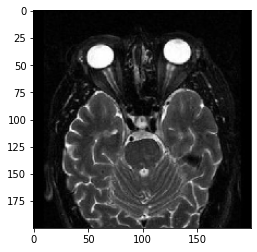

In [ ]:
plt.imshow(X[0], cmap='gray')

Prepare data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Train model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9551020408163265


In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.9591836734693877


Prediction

In [ ]:
pred = sv.predict(xtest)
misclassified=np.where(ytest!=pred)
misclassified


(array([ 10,  50,  52,  55,  57,  63, 112, 126, 153, 241]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[10],ytest[10])

Total Misclassified Samples:  10
0 1


Test model

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

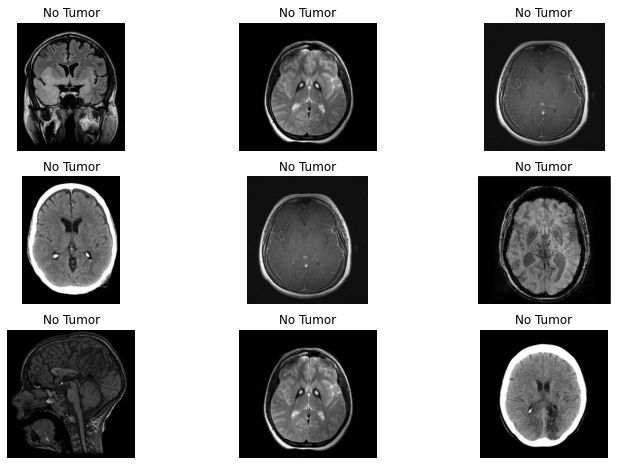

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

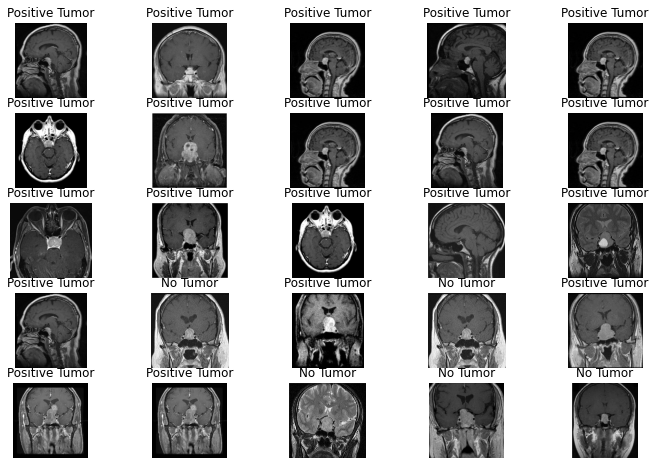

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing/pituitary_tumor/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/braintumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1